<B>Theory</B><br>
### Given data D, what structure S should we choose?

In [1]:
from pgmpy.estimators import HillClimbSearch
import numpy as np
import pandas as pd
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel

data_avengors = pd.read_csv("Avengers_superhero_powers.csv")

death_list = ["Black Panther","Spider-Man","Doctor Strange","Winter Soldier","Scarlet Witch",
                  "Maria Hill","Nick Fury","Gamora","Loki","Hawkeye","Vision","Falcon","Star-Lord","Mantis","Ultron"]

data_avengors["Survived"] = [1 if not name in death_list else 0 for name in data_avengors["Name"] ]

# create some data with dependencies

cols = []
for col in data_avengors.columns:
    if (data_avengors[col].any()==True):
        cols.append(col)
power_cols = cols[3:]
data_avengors


,Unnamed: 0,Name,minutes,seconds,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Survived
0,0,Black Panther,3,30,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1,1,Black Widow,47,45,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,2,Captain America,49,60,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,1
3,3,Falcon,2,90,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,4,Hawkeye,27,45,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
5,5,Iron Man,75,60,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,1
6,6,Quicksilver,10,0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,1
7,7,Scarlet Witch,21,0,True,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,0
8,8,Spider-Man,7,15,True,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,0
9,9,Star-Lord,10,15,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,0


In [2]:
cols = []
for col in data_avengors.columns[4:]:
    if sum(data_avengors[col])>0:
        cols.append(col)
data_avengors_reduced = data_avengors[cols]


In [3]:
list(data_avengors_reduced.columns)

['Agility',
 'Accelerated Healing',
 'Dimensional Awareness',
 'Durability',
 'Stealth',
 'Energy Absorption',
 'Flight',
 'Danger Sense',
 'Underwater breathing',
 'Marksmanship',
 'Weapons Master',
 'Animal Attributes',
 'Longevity',
 'Intelligence',
 'Super Strength',
 'Telepathy',
 'Energy Armor',
 'Energy Blasts',
 'Density Control',
 'Stamina',
 'Super Speed',
 'Animal Oriented Powers',
 'Weapon-based Powers',
 'Teleportation',
 'Enhanced Senses',
 'Telekinesis',
 'Energy Beams',
 'Magic',
 'Jump',
 'Shapeshifting',
 'Peak Human Condition',
 'Immortality',
 'Element Control',
 'Phasing',
 'Astral Projection',
 'Fire Control',
 'Enhanced Memory',
 'Reflexes',
 'Invulnerability',
 'Energy Constructs',
 'Force Fields',
 'Empathy',
 'Radiation Control',
 'Psionic Powers',
 'Substance Secretion',
 'Technopath/Cyberpath',
 'Precognition',
 'Mind Control',
 'Enhanced Hearing',
 'Natural Armor',
 'Intangibility',
 'Molecular Manipulation',
 'Gliding',
 'Power Suit',
 'Probability Manipul

Adding a survive column for all the avengors that were killed or not.<br>
#Survived and Kicking <br>
Tony Stark/Iron Man
Steve Rogers/Captain America
Thor
Bruce Banner/Hulk
Natasha Romanov/Black Widow
James Rhodes/War Machine
Rocket Raccoon
Nebula
Wong
Shuri
Okoye
M’Baku
Aunt May Parker
Howard the Duck
Captain Marvel
Scott Lang/Ant-Man (trapped in the Quantum Realm)


#DEAD
Half of the universe, including animals
T’Challa/Black Panther
Peter Parker/Spider-Man
Bucky Barnes/The Winter Soldier
Doctor Strange
Sam Wilson/Falcon
Wanda Maximoff/Scarlet Witch
Peter Quill/Star-Lord
Drax the Destroyer
Mantis
Groot
Maria Hill
Nick Fury
“Actor Loki” (played by Matt Damon)
Betty Ross from The Incredible Hulk
Lady Sif
Hank Pym
Janet van Dyne
Hope van Dyne/The Wasp

We combine the similar powers together to reduce the number of columns.Remove Thanos



In [4]:
columns_reduced = data_avengors_reduced.columns

In [5]:
translation_dict = {"Movement": "Agility, Stealth, Flight, Stamina,  Super Speed, Jump, Phasing, Gliding, Levitation, Web Creation, Dimensional Awareness,Portal Creation,wallcrawling",
"Durability": " Durability, Longevity, Energy Armor, Radiation Immunity, Toxin and Disease Resistance",
"Absorption" :"Energy Absorption, Invulnerability, Radiation Absorption",
"Awareness": "Danger Sense",
"Enhanced Body Functions": "Underwater breathing, Accelerated Healing, Super Strength, Enhanced Senses, Peak Human Condition, Reflexes, Substance Secretion, Enhanced Hearing, Regeneration, Enhanced Smell, Vision - Telescopic, Toxin and Disease Resistance, Vision - night, vision - x-ray, vision - thermal",
"Skill" :"Marksmanship, Weapons Master",
"Animal Attributes": "Animal Attributes, Animal Oriented Powers",
"Mind Powers": "Intelligence, Telepathy, Telekinesis, Astral Projection, Enhanced Memory, Empathy, Psionic Powers, technopath/cyberpath, precognition, mind control, Probability Manipulation, Illusions, Telepathy Resistance, Omnilingualism",
"Weapon": "Energy Blasts, weaponbased_powers, Energy Beams, Power Suit, Natural Weapons",
"Matter Manipulation":"Density Control, Teleportation, shapeshifting, Element Control, Phasing, Fire Control, Radiation Control, Gravity Control, Portal Creation, Magnetism, Plant Control, Invisibility, weather control",
"Magic": "Magic, Energy Constructs, Force Fields, Reality Warping, Odin Force",
"Time Powers":"precognition, Time Manipulation",
}


In [6]:
group_powers = {k:v.split(",") for k,v in translation_dict.items()}
group_powers 

{'Movement': ['Agility',
  ' Stealth',
  ' Flight',
  ' Stamina',
  '  Super Speed',
  ' Jump',
  ' Phasing',
  ' Gliding',
  ' Levitation',
  ' Web Creation',
  ' Dimensional Awareness',
  'Portal Creation',
  'wallcrawling'],
 'Durability': [' Durability',
  ' Longevity',
  ' Energy Armor',
  ' Radiation Immunity',
  ' Toxin and Disease Resistance'],
 'Absorption': ['Energy Absorption',
  ' Invulnerability',
  ' Radiation Absorption'],
 'Awareness': ['Danger Sense'],
 'Enhanced Body Functions': ['Underwater breathing',
  ' Accelerated Healing',
  ' Super Strength',
  ' Enhanced Senses',
  ' Peak Human Condition',
  ' Reflexes',
  ' Substance Secretion',
  ' Enhanced Hearing',
  ' Regeneration',
  ' Enhanced Smell',
  ' Vision - Telescopic',
  ' Toxin and Disease Resistance',
  ' Vision - night',
  ' vision - x-ray',
  ' vision - thermal'],
 'Skill': ['Marksmanship', ' Weapons Master'],
 'Animal Attributes': ['Animal Attributes', ' Animal Oriented Powers'],
 'Mind Powers': ['Intellige

In [7]:

clean_powers = lambda list_powers :[x.strip().lower().replace(" ","_").replace("-","") for x in list_powers]


In [8]:
group_powers_lowercase = {k:clean_powers(v) for k,v in group_powers.items()}

In [9]:
group_powers_lowercase

{'Movement': ['agility',
  'stealth',
  'flight',
  'stamina',
  'super_speed',
  'jump',
  'phasing',
  'gliding',
  'levitation',
  'web_creation',
  'dimensional_awareness',
  'portal_creation',
  'wallcrawling'],
 'Durability': ['durability',
  'longevity',
  'energy_armor',
  'radiation_immunity',
  'toxin_and_disease_resistance'],
 'Absorption': ['energy_absorption',
  'invulnerability',
  'radiation_absorption'],
 'Awareness': ['danger_sense'],
 'Enhanced Body Functions': ['underwater_breathing',
  'accelerated_healing',
  'super_strength',
  'enhanced_senses',
  'peak_human_condition',
  'reflexes',
  'substance_secretion',
  'enhanced_hearing',
  'regeneration',
  'enhanced_smell',
  'vision__telescopic',
  'toxin_and_disease_resistance',
  'vision__night',
  'vision__xray',
  'vision__thermal'],
 'Skill': ['marksmanship', 'weapons_master'],
 'Animal Attributes': ['animal_attributes', 'animal_oriented_powers'],
 'Mind Powers': ['intelligence',
  'telepathy',
  'telekinesis',
 

In [10]:
def map_union(df,translation_dict):
    
    
    
    def unionAll(df,list_col):
        df_new = df[list_col]
        df_new['new'] = df_new.sum(axis = 1)
        
        
        return df_new['new'].values
    reduced_columns_lowercase = [v.strip().lower().replace(" ","_").replace("-","") for v in df.columns]
    
    df.columns = reduced_columns_lowercase
    print("df columns:  \n",df.columns)
    
    for group,list_col in translation_dict.items():
        df[group] = unionAll(df,list_col) 
    
    return df

In [11]:
x = map_union(data_avengors_reduced,group_powers_lowercase)

df columns:  
 Index(['agility', 'accelerated_healing', 'dimensional_awareness', 'durability',
       'stealth', 'energy_absorption', 'flight', 'danger_sense',
       'underwater_breathing', 'marksmanship', 'weapons_master',
       'animal_attributes', 'longevity', 'intelligence', 'super_strength',
       'telepathy', 'energy_armor', 'energy_blasts', 'density_control',
       'stamina', 'super_speed', 'animal_oriented_powers',
       'weaponbased_powers', 'teleportation', 'enhanced_senses', 'telekinesis',
       'energy_beams', 'magic', 'jump', 'shapeshifting',
       'peak_human_condition', 'immortality', 'element_control', 'phasing',
       'astral_projection', 'fire_control', 'enhanced_memory', 'reflexes',
       'invulnerability', 'energy_constructs', 'force_fields', 'empathy',
       'radiation_control', 'psionic_powers', 'substance_secretion',
       'technopath/cyberpath', 'precognition', 'mind_control',
       'enhanced_hearing', 'natural_armor', 'intangibility',
       'molecu

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
y = x[group_powers_lowercase.keys()]


In [13]:
y.columns

Index(['Movement', 'Durability', 'Absorption', 'Awareness',
       'Enhanced Body Functions', 'Skill', 'Animal Attributes', 'Mind Powers',
       'Weapon', 'Matter Manipulation', 'Magic', 'Time Powers'],
      dtype='object')

In [14]:
y['Movement']

0     3
1     3
2     3
3     2
4     3
5     3
6     1
7     4
8     7
9     2
10    3
11    4
12    3
13    1
14    0
15    0
16    4
17    5
18    5
Name: Movement, dtype: int64

In [15]:
y['survived'] = data_avengors_reduced['survived']
df_grouped_powers = y.replace([1,2,3,4,5,6,7,8,9],1)
df_grouped_powers

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Movement,Durability,Absorption,Awareness,Enhanced Body Functions,Skill,Animal Attributes,Mind Powers,Weapon,Matter Manipulation,Magic,Time Powers,survived
0,1,0,0,0,1,1,0,1,0,0,0,0,0
1,1,1,0,0,1,1,0,1,0,0,0,0,1
2,1,1,0,0,1,1,0,0,1,0,0,0,1
3,1,0,0,0,0,0,1,1,0,0,0,0,0
4,1,0,0,0,1,1,0,0,0,0,0,0,0
5,1,1,1,0,1,1,0,0,1,1,1,0,1
6,1,1,0,0,1,0,0,0,0,0,0,1,1
7,1,1,0,0,0,0,0,1,1,1,1,0,0
8,1,1,0,1,1,1,1,0,1,0,0,0,0
9,1,1,0,0,1,1,0,1,0,0,0,0,0


In [16]:
hc = HillClimbSearch(df_grouped_powers, scoring_method = BicScore(df_grouped_powers))
best_model = hc.estimate()
best_model


In [17]:
edges = best_model.edges()
edges

[('Absorption', 'Matter Manipulation'),
 ('Animal Attributes', 'Awareness'),
 ('Mind Powers', 'survived'),
 ('Mind Powers', 'Movement'),
 ('Weapon', 'Durability'),
 ('Matter Manipulation', 'Magic'),
 ('Matter Manipulation', 'Weapon'),
 ('Magic', 'Skill'),
 ('Time Powers', 'Skill'),
 ('Time Powers', 'Weapon'),
 ('survived', 'Enhanced Body Functions')]

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: Matplot

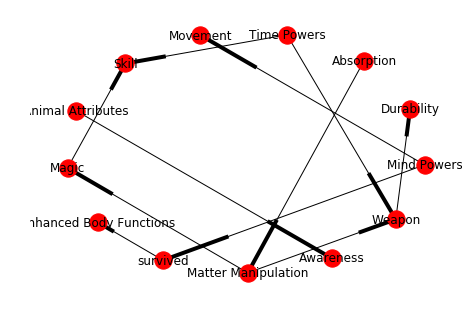

In [36]:
from pgmpy.models import BayesianModel
model = BayesianModel(edges)
import networkx as nx
import pylab as plt
nx.draw(model, with_labels=True)
plt.show()


In [19]:
model.fit(df_grouped_powers)
x = model.get_cpds('survived')
x.values

array([[ 0.33333333,  0.9       ],
       [ 0.66666667,  0.1       ]])

In [20]:
model.active_trail_nodes('survived')

{'survived': {'Enhanced Body Functions',
  'Mind Powers',
  'Movement',
  'survived'}}

In [63]:
model.get_markov_blanket('survived')

['Enhanced Body Functions', 'Mind Powers']

None


In [21]:
from pgmpy.inference import VariableElimination

model_infer = VariableElimination(model)

#Predict for Captain Marvel? 

prob_G = model_infer.query(variables=['survived'],evidence={'Awareness': 0, 'Magic':0  ,'Mind Powers': 1})

print(prob_G['survived'])

+------------+-----------------+
| survived   |   phi(survived) |
+============+=================+
| survived_0 |          0.9000 |
+------------+-----------------+
| survived_1 |          0.1000 |
+------------+-----------------+


In [22]:
for relations in edges:
    print(relations[0],"has children: ",best_model.get_children(relations[0]))
    print(relations[1],"has children: ",best_model.get_children(relations[1]))


Absorption has children:  ['Matter Manipulation']
Matter Manipulation has children:  ['Magic', 'Weapon']
Animal Attributes has children:  ['Awareness']
Awareness has children:  []
Mind Powers has children:  ['survived', 'Movement']
survived has children:  ['Enhanced Body Functions']
Mind Powers has children:  ['survived', 'Movement']
Movement has children:  []
Weapon has children:  ['Durability']
Durability has children:  []
Matter Manipulation has children:  ['Magic', 'Weapon']
Magic has children:  ['Skill']
Matter Manipulation has children:  ['Magic', 'Weapon']
Weapon has children:  ['Durability']
Magic has children:  ['Skill']
Skill has children:  []
Time Powers has children:  ['Skill', 'Weapon']
Skill has children:  []
Time Powers has children:  ['Skill', 'Weapon']
Weapon has children:  ['Durability']
survived has children:  ['Enhanced Body Functions']
Enhanced Body Functions has children:  []


In [23]:
all_nodes = []

for relations in edges:
    if (not (relations[0] in all_nodes)):
            all_nodes.append(relations[0])
    if (not (relations[1] in all_nodes)):
            all_nodes.append(relations[1])
            
            
all_nodes        

['Absorption',
 'Matter Manipulation',
 'Animal Attributes',
 'Awareness',
 'Mind Powers',
 'survived',
 'Movement',
 'Weapon',
 'Durability',
 'Magic',
 'Skill',
 'Time Powers',
 'Enhanced Body Functions']

In [24]:
import networkx as nx
G=nx.Graph()
G.add_nodes_from(all_nodes)
G.add_edges_from(edges)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: Matplot

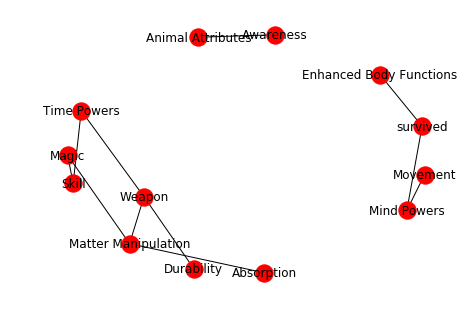

In [25]:
#HILL CLIMBING MODEL
import matplotlib.pyplot as plt
nx.draw(G,with_labels = True)
plt.savefig("network.png")

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: Matplot

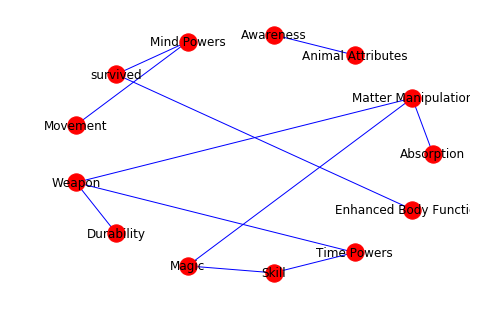

In [26]:
pos = nx.circular_layout(G)    
nx.draw(G, pos, with_labels = True, edge_color = 'b',arrowsize=20, arrowstyle='fancy')   
plt.show()

from pgmpy.estimators import ExhaustiveSearch

bic = BicScore(df_grouped_powers)

es = ExhaustiveSearch(df_grouped_powers, scoring_method=bic)
best_model = es.estimate()
print(best_model.edges())

print("\nAll DAGs by score:")
for score, dag in reversed(es.all_scores()):
    print(score, dag.edges())

In [27]:
from pgmpy.estimators import ConstraintBasedEstimator
est = ConstraintBasedEstimator(df_grouped_powers)

In [28]:
skel, seperating_sets = est.estimate_skeleton(significance_level=0.05)
print("Undirected edges: ", skel.edges())

pdag = est.skeleton_to_pdag(skel, seperating_sets)
print("PDAG edges:       ", pdag.edges())
#http://pgmpy.chrisittner.de/2016/08/17/pc.html

model = est.pdag_to_dag(pdag)
print("DAG edges:        ", model.edges())

Undirected edges:  [('Awareness', 'Animal Attributes'), ('Matter Manipulation', 'Magic')]
PDAG edges:        [('Awareness', 'Animal Attributes'), ('Animal Attributes', 'Awareness'), ('Matter Manipulation', 'Magic'), ('Magic', 'Matter Manipulation')]
DAG edges:         [('Animal Attributes', 'Awareness'), ('Magic', 'Matter Manipulation')]


In [29]:
print(est.estimate(significance_level=0.05).edges())

[('Animal Attributes', 'Awareness'), ('Magic', 'Matter Manipulation')]


In [51]:
from itertools import combinations
for node1, node2 in combinations(all_nodes,2):
    print(est.test_conditional_independence(node1,node2))

(9.3303571428571423, 0.025206272637122103, True)
(0.79831932773109249, 0.84986898569598779, True)
(0.37698412698412709, 0.94495490182363873, True)
(0.43428571428571455, 0.9330722580833849, True)
(1.5639455782312925, 0.66759226183794063, True)
(0.79831932773109249, 0.84986898569598779, True)
(7.5396825396825413, 0.056547556664640411, True)
(1.2723214285714284, 0.73571588274531186, True)
(3.9706122448979584, 0.264655012304917, True)
(0.029081632653061212, 0.99869244147936009, True)
(0.79831932773109249, 0.84986898569598779, True)
(1.2723214285714284, 0.73571588274531186, True)
(1.6256684491978608, 0.65358377737183959, True)
(0.76767676767676762, 0.8571816570128421, True)
(0.5397727272727274, 0.9100705523050886, True)
(0.0025703463203463092, 0.99996536849149342, True)
(1.625668449197861, 0.65358377737183959, True)
(8.9266414141414145, 0.030282297534462703, True)
(2.5909090909090908, 0.45908553013557862, True)
(9.3303571428571423, 0.025206272637122103, True)
(3.9094967532467528, 0.27140414

In [53]:
?ConstraintBasedEstimator
